In [593]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import ElasticNet, Lasso, Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from sklearn.pipeline import Pipeline
from scipy.stats import norm, skew, kurtosis
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from xgboost import XGBRegressor
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import pymssql as mssql
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd

In [594]:
# 그래프 그리기 위한 matplolib
%matplotlib inline
plt.style.use('ggplot')
#폰트깨짐방지
mpl.rcParams['axes.unicode_minus']=False

## 변수 선택후 결과 뽑아내는 과정 (반복작업)

In [595]:
train_outclear = pd.read_csv("train_outclear.csv", parse_dates=["datetime"])

In [596]:
train_outclear.head()

,datetime,tourday,b1,b2,b3,f1,f2,f3,f4,x1,...,ar24,ar25,ar26,ar27,ar28,ar29,art1,art2,art3,count
0,2015-01-01,9,2,12,101,3,456,30,0,0,...,0,0,0,0,0,0,53,0,62,321
1,2015-01-02,9,3,2,81,3,304,27,-1,0,...,2,0,0,0,0,0,44,0,42,271
2,2015-01-03,8,1,4,81,3,285,14,-1,0,...,0,0,0,0,0,0,39,0,47,315
3,2015-01-04,9,2,3,82,4,349,23,0,0,...,0,0,0,0,1,0,37,0,50,271
4,2015-01-05,10,4,5,54,3,202,20,0,1,...,0,0,0,0,0,0,39,0,24,109


In [597]:
test_outclear = pd.read_csv("test_outclear.csv", parse_dates=["datetime"])

In [598]:
test_outclear.head()

,datetime,tourday,b1,b2,b3,f1,f2,f3,f4,x1,...,ar23,ar24,ar25,ar26,ar27,ar28,ar29,art1,art2,art3
0,2019-01-01,9,7,1,84,4,418,13,0,0,...,0,0,0,0,0,0,0,48,1,43
1,2019-01-02,9,9,2,94,4,450,34,0,0,...,0,0,0,0,0,0,0,52,1,52
2,2019-01-03,9,9,2,83,3,316,13,0,0,...,0,0,0,0,0,0,0,52,1,41
3,2019-01-04,9,1,2,72,3,262,28,0,0,...,0,1,0,0,0,0,0,33,1,41
4,2019-01-05,9,6,0,68,3,222,15,0,0,...,0,0,0,0,0,0,0,35,1,38


In [599]:
##새로 탐색하는 데이터에 결측치가 있는지 없는지 체크
train_outclear.columns[train_outclear.isna().any()].tolist()

[]

In [600]:
##새로 탐색하는 데이터에 결측치가 있는지 없는지 체크
test_outclear.columns[test_outclear.isna().any()].tolist()

[]

In [601]:
## 트레인과 테스트 데이터를 복사하여 정규화 진행 예정
## 기존 원데이터를 사용하여 정규화 진행 후 진행 전 데이터를 비교하기 위해 데이터를 COPY하여 진행
X_train = train_outclear.copy()
X_test = test_outclear.copy()

In [602]:
## 정규화 진행 전 datetime과 count는 제외시키고 진행해야 되기 때문에 iloc으로 해당 위치 컬럼만 불러옴
X_train.iloc[:,1:-1]

,tourday,b1,b2,b3,f1,f2,f3,f4,x1,x2,...,ar23,ar24,ar25,ar26,ar27,ar28,ar29,art1,art2,art3
0,9,2,12,101,3,456,30,0,0,4,...,0,0,0,0,0,0,0,53,0,62
1,9,3,2,81,3,304,27,-1,0,65,...,0,2,0,0,0,0,0,44,0,42
2,8,1,4,81,3,285,14,-1,0,38,...,0,0,0,0,0,0,0,39,0,47
3,9,2,3,82,4,349,23,0,0,36,...,0,0,0,0,0,1,0,37,0,50
4,10,4,5,54,3,202,20,0,1,90,...,0,0,0,0,0,0,0,39,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,9,7,1,117,4,602,27,0,0,20,...,0,0,0,0,0,0,0,76,1,48
1457,9,3,2,99,3,396,22,0,0,36,...,0,0,0,0,0,0,0,42,1,61
1458,9,8,5,113,4,541,33,-1,0,19,...,0,0,0,0,0,0,0,73,1,52
1459,9,8,2,102,3,443,26,-2,0,30,...,0,0,0,0,0,1,0,54,1,57


In [603]:
## 우선 표준정규화를 진행해볼예정
scaler = StandardScaler()

In [604]:
## datetime과 count를 제외하고 해당 feature들만 정규화 하기위해 iloc을 사용
fit_train = scaler.fit_transform(X_train.iloc[:,1:-1])

In [605]:
## 정규화된 값들의 array
fit_train

array([[-0.26671651, -1.33552104,  3.98062512, ..., -0.51266625,
        -0.47567415,  0.72289928],
       [-0.26671651, -1.0379465 , -0.09056375, ..., -1.00884236,
        -0.47567415, -1.01106205],
       [-3.05009377, -1.63309557,  0.72367402, ..., -1.28449575,
        -0.47567415, -0.57757172],
       ...,
       [-0.26671651,  0.44992618,  1.13079291, ...,  0.58994732,
         0.72876248, -0.14408139],
       [-0.26671651,  0.44992618, -0.09056375, ..., -0.45753558,
         0.72876248,  0.28940895],
       [ 2.51666075,  1.04507525, -0.49768264, ..., -1.33962643,
        -0.47567415, -0.40417558]])

In [606]:
## 정규화된 array 값들을 기존의 데이터에서 정규화 데이터로 교체 진행
X_train.iloc[:,1:-1] = fit_train

In [607]:
## 정규화가 완료된 트레인 데이터
X_train.head()

,datetime,tourday,b1,b2,b3,f1,f2,f3,f4,x1,...,ar24,ar25,ar26,ar27,ar28,ar29,art1,art2,art3,count
0,2015-01-01,-0.266717,-1.335521,3.980625,-0.272303,-0.180422,0.185103,0.636180,0.441235,-0.330490,...,-0.446512,0.0,-0.026171,-0.37035,-0.402854,-0.284131,-0.512666,-0.475674,0.722899,321
1,2015-01-02,-0.266717,-1.037946,-0.090564,-1.091819,-0.180422,-0.861253,0.383197,0.281867,-0.330490,...,1.576291,0.0,-0.026171,-0.37035,-0.402854,-0.284131,-1.008842,-0.475674,-1.011062,271
2,2015-01-03,-3.050094,-1.633096,0.723674,-1.091819,-0.180422,-0.992048,-0.713061,0.281867,-0.330490,...,-0.446512,0.0,-0.026171,-0.37035,-0.402854,-0.284131,-1.284496,-0.475674,-0.577572,315
3,2015-01-04,-0.266717,-1.335521,0.316555,-1.050843,0.913342,-0.551477,0.045887,0.441235,-0.330490,...,-0.446512,0.0,-0.026171,-0.37035,2.482290,-0.284131,-1.394757,-0.475674,-0.317478,271
4,2015-01-05,2.516661,-0.740372,1.130793,-2.198165,-0.180422,-1.563413,-0.207096,0.441235,2.784642,...,-0.446512,0.0,-0.026171,-0.37035,-0.402854,-0.284131,-1.284496,-0.475674,-2.571627,109


In [608]:
## 테스터 데이터도 진행
X_test.iloc[:,1:]

,tourday,b1,b2,b3,f1,f2,f3,f4,x1,x2,...,ar23,ar24,ar25,ar26,ar27,ar28,ar29,art1,art2,art3
0,9,7,1,84,4,418,13,0,0,45,...,0,0,0,0,0,0,0,48,1,43
1,9,9,2,94,4,450,34,0,0,83,...,0,0,0,0,0,0,0,52,1,52
2,9,9,2,83,3,316,13,0,0,20,...,0,0,0,0,0,0,0,52,1,41
3,9,1,2,72,3,262,28,0,0,31,...,0,1,0,0,0,0,0,33,1,41
4,9,6,0,68,3,222,15,0,0,46,...,0,0,0,0,0,0,0,35,1,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,8,3,5,32,1,56,27,-4,0,38,...,0,1,0,0,0,0,0,21,0,19
361,8,5,1,22,0,-10,0,-8,0,-3,...,0,0,0,0,0,0,0,17,0,11
362,9,4,3,41,1,74,10,0,0,42,...,0,0,0,0,0,0,0,31,0,17
363,10,6,0,19,1,44,13,-15,1,31,...,0,0,0,0,0,0,0,11,0,14


In [609]:
fit_test = scaler.fit_transform(X_test.iloc[:,1:])

In [610]:
fit_test

array([[-0.25668645, -0.31253813, -0.53554281, ...,  0.78829106,
        -0.08918339,  0.21360529],
       [-0.25668645,  0.2636054 , -0.03044429, ...,  1.13896289,
        -0.08918339,  0.95222989],
       [-0.25668645,  0.2636054 , -0.03044429, ...,  1.13896289,
        -0.08918339,  0.04946649],
       ...,
       [-0.25668645, -1.17675343,  0.47465422, ..., -0.70206422,
        -1.39126095, -1.92019911],
       [ 2.20885449, -0.6006099 , -1.04064133, ..., -2.45542336,
        -1.39126095, -2.16640731],
       [-0.25668645, -0.88868167, -1.04064133, ..., -0.78973217,
        -1.39126095, -1.50985211]])

In [611]:
X_test.iloc[:,1:] = fit_test

In [612]:
X_test

,datetime,tourday,b1,b2,b3,f1,f2,f3,f4,x1,...,ar23,ar24,ar25,ar26,ar27,ar28,ar29,art1,art2,art3
0,2019-01-01,-0.256686,-0.312538,-0.535543,0.684917,0.932320,0.989744,-1.423688,0.561462,-0.645081,...,-0.384814,-0.635489,0.0,0.0,0.0,0.0,0.0,0.788291,-0.089183,0.213605
1,2019-01-02,-0.256686,0.263605,-0.030444,1.185909,0.932320,1.244570,1.908394,0.561462,-0.645081,...,-0.384814,-0.635489,0.0,0.0,0.0,0.0,0.0,1.138963,-0.089183,0.952230
2,2019-01-03,-0.256686,0.263605,-0.030444,0.634818,-0.034432,0.177484,-1.423688,0.561462,-0.645081,...,-0.384814,-0.635489,0.0,0.0,0.0,0.0,0.0,1.138963,-0.089183,0.049466
3,2019-01-04,-0.256686,-2.040969,-0.030444,0.083727,-0.034432,-0.252536,0.956371,0.561462,-0.645081,...,-0.384814,1.573592,0.0,0.0,0.0,0.0,0.0,-0.526728,-0.089183,0.049466
4,2019-01-05,-0.256686,-0.600610,-1.040641,-0.116669,-0.034432,-0.571069,-1.106347,0.561462,-0.645081,...,-0.384814,-0.635489,0.0,0.0,0.0,0.0,0.0,-0.351392,-0.089183,-0.196742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,-2.722227,-1.464825,1.484851,-1.920240,-1.967937,-1.892982,0.797700,-0.090674,-0.645081,...,-0.384814,1.573592,0.0,0.0,0.0,0.0,0.0,-1.578744,-1.391261,-1.756060
361,2019-12-28,-2.722227,-0.888682,-0.535543,-2.421231,-2.934690,-2.418562,-3.486406,-0.742809,-0.645081,...,-0.384814,-0.635489,0.0,0.0,0.0,0.0,0.0,-1.929416,-1.391261,-2.412616
362,2019-12-29,-0.256686,-1.176753,0.474654,-1.469347,-1.967937,-1.749642,-1.899700,0.561462,-0.645081,...,-0.384814,-0.635489,0.0,0.0,0.0,0.0,0.0,-0.702064,-1.391261,-1.920199
363,2019-12-30,2.208854,-0.600610,-1.040641,-2.571529,-1.967937,-1.988542,-1.423688,-1.884047,1.013050,...,-0.384814,-0.635489,0.0,0.0,0.0,0.0,0.0,-2.455423,-1.391261,-2.166407


In [613]:
X_train['year']=X_train["datetime"].dt.year
X_train['month']=X_train["datetime"].dt.month
X_train['week']=X_train["datetime"].dt.week
X_train['day']=X_train["datetime"].dt.day
X_train["dayofweek"] = X_train["datetime"].dt.dayofweek

X_test["year"] = X_test["datetime"].dt.year
X_test["month"] = X_test["datetime"].dt.month
X_test['week']= X_test["datetime"].dt.week
X_test["day"] = X_test["datetime"].dt.day
X_test["dayofweek"] = X_test["datetime"].dt.dayofweek

In [614]:
## 시즌 데이터 추가
def badToRight(month):
    if month in [12,1,2]:
        return 4 ## 겨울
    elif month in [3,4,5]:
        return 1 ## 봄
    elif month in [6,7,8]:
        return 2 ## 여름
    elif month in [9,10,11]:
        return 3 ## 가을

X_train['season'] = X_train.month.apply(badToRight)

## 시즌 데이터 추가
def badToRight(month):
    if month in [12,1,2]:
        return 4 ## 겨울
    elif month in [3,4,5]:
        return 1 ## 봄
    elif month in [6,7,8]:
        return 2 ## 여름
    elif month in [9,10,11]:
        return 3 ## 가을

X_test['season'] = X_test.month.apply(badToRight)

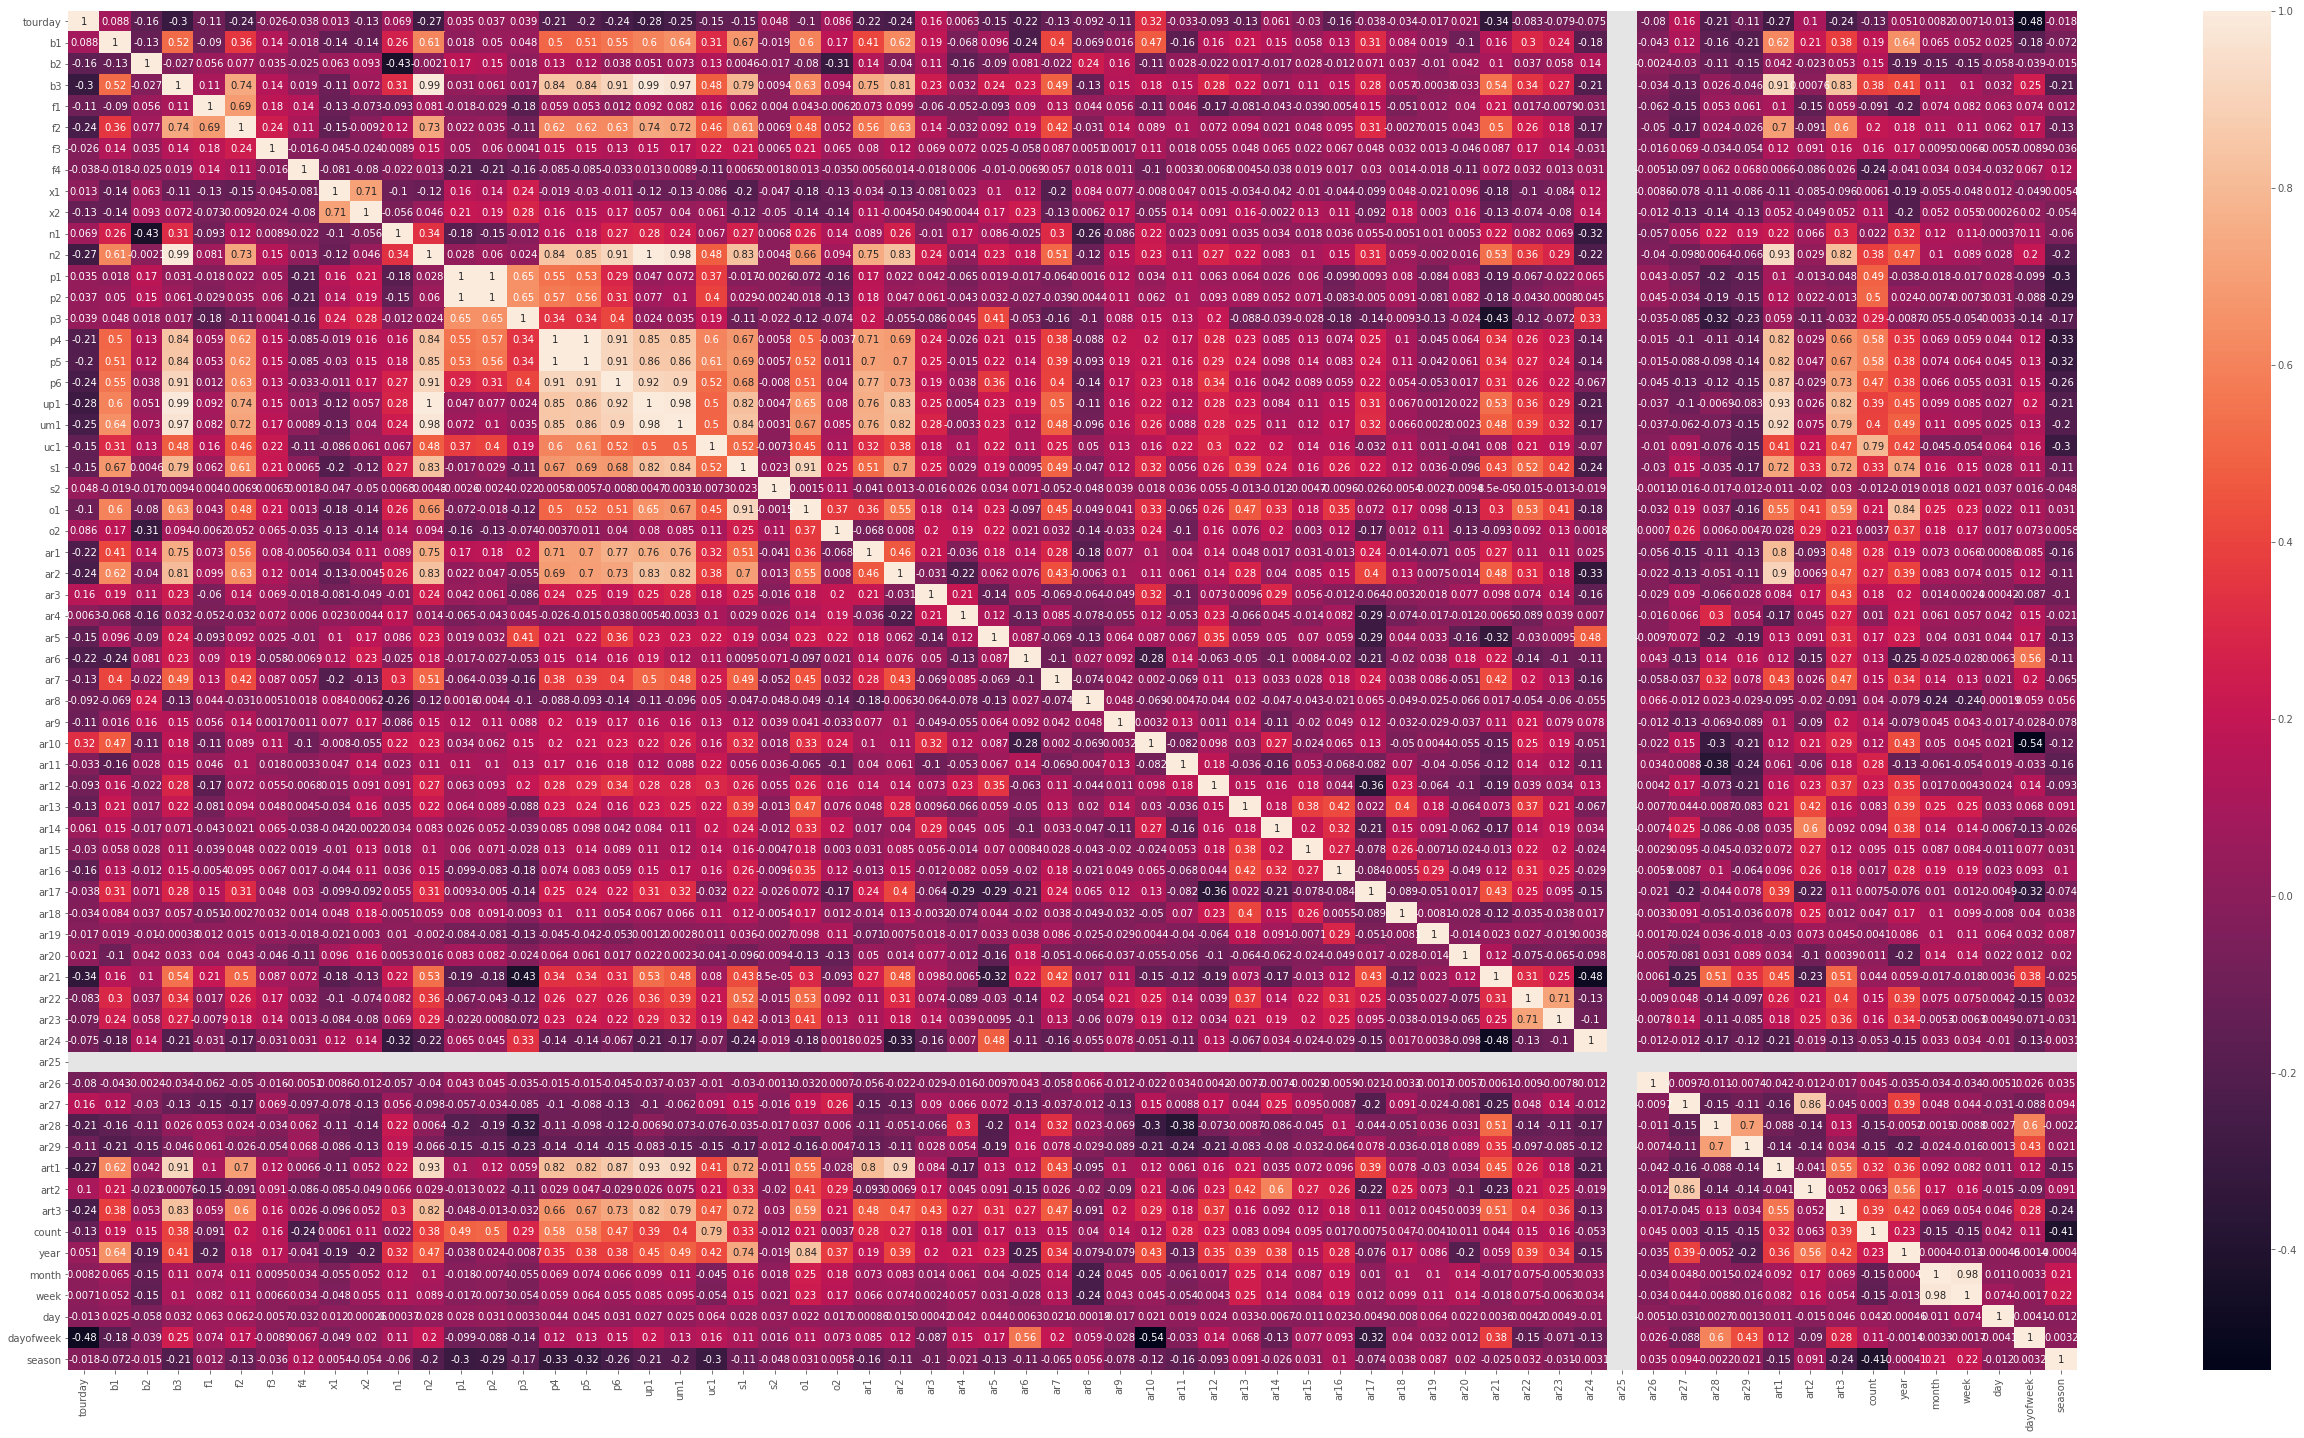

In [615]:
## 상관관계도를 시각화
transformed_corr_x = X_train.corr()
plt.figure(figsize=(45,25))
sns.heatmap(transformed_corr_x, annot=True)

### 양의 상관계수를 가지는 변수
- "b1","b2","b3","f2","f3","x1","x2","n1","n2","p1","p2","p3","p4","p5","p6","up1","um1","uc1","s1","o1","o2","ar1","ar2","ar3","ar4","ar5","ar6","ar7","ar8","ar9","ar10","ar11","ar12","ar13","ar14","ar15","ar16","ar17","ar18","ar20","ar21","ar22","ar23","ar26","ar27","art1","art2","art3", "year", "day","dayofweek"
### 0.1이상 양의 상관계수 변수
- "b1","b2","b3","f2","f3","x2","n2","p1","p2","p3","p4","p5","p6","up1","um1","uc1","s1","o1","ar1",ar2","ar3","ar4","ar5","ar6","ar7","ar8","ar9","ar10","ar11","ar12","ar22,"ar23,"art1",art2","art3","dayofweek"


### 테스트로 상관계수 높은것들만 랜덤포레스트 진행

In [616]:
feature_names = ["b1","b2","b3","f2","f3","x1","x2","n1","n2","p1","p2","p3","p4","p5","p6","up1","um1","uc1","s1","o1","o2","ar1","ar2","ar3","ar4","ar5","ar6","ar7","ar8","ar9","ar10","ar11","ar12","ar13","ar14","ar15","ar16","ar17","ar18","ar20","ar21","ar22","ar23","ar26","ar27","art1","art2","art3","year","day","dayofweek"]

In [617]:
T_train = X_train[feature_names]
print(T_train.shape)
T_train.head()

(1461, 51)


,b1,b2,b3,f2,f3,x1,x2,n1,n2,p1,...,ar22,ar23,ar26,ar27,art1,art2,art3,year,day,dayofweek
0,-1.335521,3.980625,-0.272303,0.185103,0.636180,-0.330490,-0.851313,-2.162340,-0.241092,0.285035,...,-0.342492,-0.297406,-0.026171,-0.37035,-0.512666,-0.475674,0.722899,2015,1,3
1,-1.037946,-0.090564,-1.091819,-0.861253,0.383197,-0.330490,0.407082,-2.162340,-1.225051,0.480704,...,-0.342492,-0.297406,-0.026171,-0.37035,-1.008842,-0.475674,-1.011062,2015,2,4
2,-1.633096,0.723674,-1.091819,-0.992048,-0.713061,-0.330490,-0.149913,-2.162340,-1.272357,-0.528512,...,-0.342492,-0.297406,-0.026171,-0.37035,-1.284496,-0.475674,-0.577572,2015,3,5
3,-1.335521,0.316555,-1.050843,-0.551477,0.045887,-0.330490,-0.191172,0.158879,-1.064212,-0.385462,...,-0.342492,-0.297406,-0.026171,-0.37035,-1.394757,-0.475674,-0.317478,2015,4,6
4,-0.740372,1.130793,-2.198165,-1.563413,-0.207096,2.784642,0.922817,-2.162340,-2.080339,1.216212,...,-0.342492,-0.297406,-0.026171,-0.37035,-1.284496,-0.475674,-2.571627,2015,5,0


In [618]:
T_test = X_test[feature_names]

print(T_test.shape)
T_test.head()

(365, 51)


,b1,b2,b3,f2,f3,x1,x2,n1,n2,p1,...,ar22,ar23,ar26,ar27,art1,art2,art3,year,day,dayofweek
0,-0.312538,-0.535543,0.684917,0.989744,-1.423688,-0.645081,-0.462806,0.201454,0.577113,-0.970666,...,1.123828,-0.384814,0.0,0.0,0.788291,-0.089183,0.213605,2019,1,1
1,0.263605,-0.030444,1.185909,1.244570,1.908394,-0.645081,0.386172,0.201454,1.071577,-0.606641,...,-0.795972,-0.384814,0.0,0.0,1.138963,-0.089183,0.952230,2019,2,2
2,0.263605,-0.030444,0.634818,0.177484,-1.423688,-0.645081,-1.021344,0.201454,0.657607,-0.756877,...,-0.795972,-0.384814,0.0,0.0,1.138963,-0.089183,0.049466,2019,3,3
3,-2.040969,-0.030444,0.083727,-0.252536,0.956371,-0.645081,-0.775588,0.201454,-0.287624,-1.239850,...,-0.156039,-0.384814,0.0,0.0,-0.526728,-0.089183,0.049466,2019,4,4
4,-0.600610,-1.040641,-0.116669,-0.571069,-1.106347,-0.645081,-0.440465,0.201454,-0.285324,-0.683875,...,0.483895,-0.384814,0.0,0.0,-0.351392,-0.089183,-0.196742,2019,5,5


In [619]:
## 정답컬럼 추출
label_name = "count"

Y_train = X_train[label_name]

print(Y_train.shape)
Y_train.head()

(1461,)


0    321
1    271
2    315
3    271
4    109
Name: count, dtype: int64

In [620]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators=100,
                              n_jobs=-1,
                              random_state=0)
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [621]:
# 학습시킴, 피팅(옷을 맞출 때 사용하는 피팅을 생각함) - 피처와 레이블을 넣어주면 알아서 학습을 함
model.fit(T_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [622]:
pred = model.predict(T_test)

print(pred.shape)
pred[0:10]

(365,)


array([133.73, 279.12, 182.73, 224.35, 188.15, 232.48, 183.98, 186.9 ,
       169.48, 200.16])

In [623]:
submission = pd.read_csv("sampleSubmission.csv")
submission

submission["count"] = pred

print(submission.shape)
submission.head()

(365, 2)


,datetime,count
0,2019-01-01,133.73
1,2019-01-02,279.12
2,2019-01-03,182.73
3,2019-01-04,224.35
4,2019-01-05,188.15


In [82]:
submission.to_csv(f"submission_third(timeadd).csv", index=False)

In [572]:
sub = pd.read_csv("submission_third(timeadd).csv", parse_dates=["datetime"])

In [624]:
sub = sub['count']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [574]:
sub = np.array(sub)
sub

array([134, 279, 183, 224, 188, 232, 184, 187, 169, 200, 315, 177, 280,
       177, 191, 350, 158, 338, 297, 200, 174, 204, 188, 124, 170, 146,
       174, 259, 203, 387, 287, 388, 376, 163, 231, 131, 308, 145, 214,
       180, 168, 189, 160, 199, 160, 271, 184, 168, 195, 189, 257, 199,
       220, 181, 196, 156, 132, 216, 163, 237, 169, 124, 160, 169, 304,
       163, 266, 177, 242, 178, 229, 333, 149, 305, 310, 163, 347, 195,
       328, 216, 336, 197, 266, 242, 166, 404, 171, 346, 256, 296, 244,
       294, 317, 340, 300, 223, 209, 308, 279, 348, 236, 427, 237, 301,
       212, 265, 313, 322, 407, 422, 229, 280, 344, 399, 343, 385, 301,
       256, 396, 304, 327, 393, 435, 432, 263, 246, 345, 371, 332, 484,
       373, 400, 215, 401, 454, 341, 433, 439, 342, 294, 438, 428, 445,
       408, 460, 250, 216, 537, 362, 350, 423, 334, 356, 205, 262, 367,
       382, 392, 370, 297, 270, 429, 395, 243, 329, 460, 200, 169, 399,
       360, 326, 378, 410, 187, 165, 380, 357, 267, 359, 406, 24

In [575]:
answer = pd.read_csv("submission_outclear.csv", parse_dates=["datetime"])

In [576]:
answer = answer['dep_count']

In [580]:
answer = np.array(answer)

In [581]:
answer

array([147, 284, 238, 222, 231, 302, 218, 261, 324, 278, 474, 254, 440,
       233, 324, 474, 225, 469, 364, 391, 314, 269, 239, 138, 264, 160,
       203, 276, 332, 502, 383, 493, 425, 275, 267, 142, 362, 207, 318,
       275, 216, 226, 198, 204, 214, 403, 352, 290, 244, 260, 249, 223,
       263, 213, 297, 174, 200, 191, 253, 318, 186, 161, 212, 229, 311,
       267, 375, 190, 343, 204, 488, 315, 311, 456, 338, 249, 343, 232,
       267, 350, 473, 258, 334, 221, 308, 518, 289, 590, 307, 401, 209,
       401, 357, 428, 424, 173, 250, 237, 405, 444, 354, 507, 279, 409,
       205, 379, 415, 420, 473, 457, 283, 270, 415, 339, 485, 460, 314,
       321, 255, 381, 252, 330, 471, 438, 437, 190, 582, 279, 519, 625,
       397, 467, 246, 578, 358, 489, 596, 459, 475, 268, 486, 372, 456,
       450, 502, 390, 260, 583, 281, 505, 663, 395, 506, 242, 368, 441,
       426, 514, 248, 296, 277, 505, 267, 260, 284, 431, 212, 142, 355,
       256, 311, 390, 382, 203, 121, 398, 335, 250, 502, 417, 29

In [584]:
import numpy as np
## 절대 평균 오차
def MAE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred)))

MAE(answer, sub)

72.28767123287672

In [585]:
## 평균 절대 백분율 오차
## 실제값 대비 오차의 절대값들의 평균
def MAPE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(answer, sub)

##25%벗어남 정답에서

24.692204237823052

In [582]:
accuracy_score(answer,sub)

0.0

In [583]:
recall_score(answer,sub, average='weighted')

0.0

In [95]:
from sklearn.metrics import classification_report
print(classification_report(answer, sub))

              precision    recall  f1-score   support

          40       0.00      0.00      0.00       0.0
          53       0.00      0.00      0.00       1.0
          57       0.00      0.00      0.00       0.0
          65       0.00      0.00      0.00       0.0
          73       0.00      0.00      0.00       0.0
          74       0.00      0.00      0.00       0.0
          75       0.00      0.00      0.00       0.0
          76       0.00      0.00      0.00       0.0
          80       0.00      0.00      0.00       0.0
          82       0.00      0.00      0.00       0.0
          83       0.00      0.00      0.00       0.0
          86       0.00      0.00      0.00       0.0
          88       0.00      0.00      0.00       1.0
          89       0.00      0.00      0.00       0.0
          90       0.00      0.00      0.00       0.0
          91       0.00      0.00      0.00       1.0
          95       0.00      0.00      0.00       0.0
          96       0.00    

- year, day, dayofweek 안넣을 때가 더 잘나왓음

### 상관계수 0.1 이상인것만 테스트

In [625]:
feature_names = ["b1","b2","b3","f2","f3","x2","n2","p1","p2","p3","p4","p5","p6","up1","um1","uc1","s1","o1","ar1","ar2","ar3","ar4","ar5","ar6","ar7","ar8","ar9","ar10","ar11","ar12","ar22","ar23","art1","art2","art3","dayofweek"]

In [626]:
T_train = X_train[feature_names]
print(T_train.shape)
T_train.head()

(1461, 36)


,b1,b2,b3,f2,f3,x2,n2,p1,p2,p3,...,ar9,ar10,ar11,ar12,ar22,ar23,art1,art2,art3,dayofweek
0,-1.335521,3.980625,-0.272303,0.185103,0.636180,-0.851313,-0.241092,0.285035,0.340266,-0.422543,...,1.355081,-0.466771,0.212696,0.161905,-0.342492,-0.297406,-0.512666,-0.475674,0.722899,3
1,-1.037946,-0.090564,-1.091819,-0.861253,0.383197,0.407082,-1.225051,0.480704,0.379969,-0.140794,...,-0.456239,-0.466771,-0.504968,0.161905,-0.342492,-0.297406,-1.008842,-0.475674,-1.011062,4
2,-1.633096,0.723674,-1.091819,-0.992048,-0.713061,-0.149913,-1.272357,-0.528512,-0.557960,-1.317174,...,-0.456239,-0.824002,2.006853,-0.656586,-0.342492,-0.297406,-1.284496,-0.475674,-0.577572,5
3,-1.335521,0.316555,-1.050843,-0.551477,0.045887,-0.191172,-1.064212,-0.385462,-0.402088,-0.798410,...,-0.456239,-1.181232,-1.222631,-1.065831,-0.342492,-0.297406,-1.394757,-0.475674,-0.317478,6
4,-0.740372,1.130793,-2.198165,-1.563413,-0.207096,0.922817,-2.080339,1.216212,1.071977,0.939368,...,-0.456239,-1.181232,-1.222631,-1.884322,-0.342492,-0.297406,-1.284496,-0.475674,-2.571627,0


In [627]:
T_test = X_test[feature_names]

print(T_test.shape)
T_test.head()

(365, 36)


,b1,b2,b3,f2,f3,x2,n2,p1,p2,p3,...,ar9,ar10,ar11,ar12,ar22,ar23,art1,art2,art3,dayofweek
0,-0.312538,-0.535543,0.684917,0.989744,-1.423688,-0.462806,0.577113,-0.970666,-0.987793,-0.971490,...,-0.263422,-1.188202,0.301542,-0.704276,1.123828,-0.384814,0.788291,-0.089183,0.213605,1
1,0.263605,-0.030444,1.185909,1.244570,1.908394,0.386172,1.071577,-0.606641,-0.607788,-1.441581,...,-0.263422,1.281228,0.728142,-0.312415,-0.795972,-0.384814,1.138963,-0.089183,0.952230,2
2,0.263605,-0.030444,0.634818,0.177484,-1.423688,-1.021344,0.657607,-0.756877,-0.795835,-0.774129,...,-0.263422,-1.188202,-0.978258,-1.096137,-0.795972,-0.384814,1.138963,-0.089183,0.049466,3
3,-2.040969,-0.030444,0.083727,-0.252536,0.956371,-0.775588,-0.287624,-1.239850,-1.248335,-1.913734,...,-0.263422,-0.879523,1.581341,-0.704276,-0.156039,-0.384814,-0.526728,-0.089183,0.049466,4
4,-0.600610,-1.040641,-0.116669,-0.571069,-1.106347,-0.440465,-0.285324,-0.683875,-0.673364,-1.282450,...,-0.263422,0.355192,0.301542,0.471307,0.483895,-0.384814,-0.351392,-0.089183,-0.196742,5


In [628]:
## 정답컬럼 추출
label_name = "count"

Y_train = X_train[label_name]

print(Y_train.shape)
Y_train.head()

(1461,)


0    321
1    271
2    315
3    271
4    109
Name: count, dtype: int64

In [629]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators=100,
                              n_jobs=-1,
                              random_state=0)
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [630]:
# 학습시킴, 피팅(옷을 맞출 때 사용하는 피팅을 생각함) - 피처와 레이블을 넣어주면 알아서 학습을 함
model.fit(T_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [631]:
pred = model.predict(T_test)

print(pred.shape)
pred[0:10]

(365,)


array([133.07, 284.71, 183.91, 221.46, 190.41, 242.56, 184.18, 185.11,
       170.02, 205.38])

In [632]:
submission = pd.read_csv("sampleSubmission.csv")
submission

submission["count"] = pred

print(submission.shape)
submission.head()

(365, 2)


,datetime,count
0,2019-01-01,133.07
1,2019-01-02,284.71
2,2019-01-03,183.91
3,2019-01-04,221.46
4,2019-01-05,190.41


In [105]:
submission.to_csv(f"submission_4(timeadd).csv", index=False)

In [634]:
sub = pd.read_csv("submission_4.csv", parse_dates=["datetime"])

In [635]:
sub = sub['count']
sub = np.array(sub)
sub

array([135, 284, 183, 220, 188, 239, 184, 188, 174, 199, 316, 177, 283,
       183, 186, 345, 165, 338, 294, 198, 174, 210, 199, 122, 175, 145,
       166, 264, 208, 382, 290, 382, 377, 164, 243, 126, 318, 144, 213,
       183, 165, 188, 152, 213, 154, 274, 182, 170, 197, 193, 264, 196,
       230, 183, 199, 157, 140, 230, 167, 236, 169, 125, 166, 166, 311,
       159, 274, 177, 240, 174, 233, 342, 149, 300, 308, 155, 339, 194,
       338, 213, 319, 199, 259, 240, 165, 404, 172, 335, 254, 289, 233,
       287, 325, 333, 291, 225, 198, 300, 275, 352, 234, 432, 231, 293,
       212, 267, 313, 325, 413, 428, 236, 277, 330, 417, 344, 394, 300,
       248, 404, 296, 326, 378, 438, 435, 260, 237, 338, 373, 334, 493,
       375, 399, 218, 393, 456, 343, 432, 440, 345, 292, 437, 427, 433,
       407, 462, 254, 212, 534, 356, 344, 431, 332, 357, 210, 255, 366,
       383, 390, 375, 297, 288, 422, 394, 233, 326, 459, 205, 174, 390,
       369, 315, 371, 412, 187, 167, 370, 366, 265, 353, 398, 23

In [636]:
answer

array([147, 284, 238, 222, 231, 302, 218, 261, 324, 278, 474, 254, 440,
       233, 324, 474, 225, 469, 364, 391, 314, 269, 239, 138, 264, 160,
       203, 276, 332, 502, 383, 493, 425, 275, 267, 142, 362, 207, 318,
       275, 216, 226, 198, 204, 214, 403, 352, 290, 244, 260, 249, 223,
       263, 213, 297, 174, 200, 191, 253, 318, 186, 161, 212, 229, 311,
       267, 375, 190, 343, 204, 488, 315, 311, 456, 338, 249, 343, 232,
       267, 350, 473, 258, 334, 221, 308, 518, 289, 590, 307, 401, 209,
       401, 357, 428, 424, 173, 250, 237, 405, 444, 354, 507, 279, 409,
       205, 379, 415, 420, 473, 457, 283, 270, 415, 339, 485, 460, 314,
       321, 255, 381, 252, 330, 471, 438, 437, 190, 582, 279, 519, 625,
       397, 467, 246, 578, 358, 489, 596, 459, 475, 268, 486, 372, 456,
       450, 502, 390, 260, 583, 281, 505, 663, 395, 506, 242, 368, 441,
       426, 514, 248, 296, 277, 505, 267, 260, 284, 431, 212, 142, 355,
       256, 311, 390, 382, 203, 121, 398, 335, 250, 502, 417, 29

In [637]:
## 평균 절대 백분율 오차
## 실제값 대비 오차의 절대값들의 평균
def MAPE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(answer, sub)

##25%벗어남 정답에서

24.794825603896232

In [638]:
from sklearn.metrics import classification_report
print(classification_report(answer, sub))

              precision    recall  f1-score   support

          48       0.00      0.00      0.00         0
          53       0.00      0.00      0.00         1
          55       0.00      0.00      0.00         0
          60       0.00      0.00      0.00         0
          62       0.00      0.00      0.00         0
          65       0.00      0.00      0.00         0
          66       0.00      0.00      0.00         0
          68       0.00      0.00      0.00         0
          73       0.00      0.00      0.00         0
          77       0.00      0.00      0.00         0
          81       0.00      0.00      0.00         0
          83       0.00      0.00      0.00         0
          84       0.00      0.00      0.00         0
          85       0.00      0.00      0.00         0
          88       0.00      0.00      0.00         1
          89       0.00      0.00      0.00         0
          91       0.00      0.00      0.00         1
          97       0.00    

In [267]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(answer ,sub, average= 'micro')
recall = recall_score(answer ,sub, average='micro')
print(precision)
print(recall)

0.00821917808219178
0.00821917808219178


In [268]:
precision = precision_score(answer ,sub, average= 'weighted')
recall = recall_score(answer ,sub, average='weighted')

In [269]:
print(precision)
print(recall)

0.0182648401826484
0.00821917808219178


In [270]:
from sklearn.metrics import f1_score
f1 = f1_score(answer ,sub,average='micro')
f2 = f1_score(answer ,sub,average='macro')
f3 = f1_score(answer ,sub,average='weighted')
print(f1)
print(f2)
print(f3)

0.00821917808219178
0.003966005665722379
0.010410958904109589


### 피쳐 임포턴스가 높은것만 돌려보기

In [271]:
feature_names = ["b2","b3","f2","f3","n2","p1","p2","p3","p4","p5","up1","um1","uc1","ar1","ar2","ar3","ar4","ar5","ar6","ar10","ar11","dayofweek"]

In [272]:
T_train = X_train[feature_names]
print(T_train.shape)
T_train.head()

(1461, 22)


,b2,b3,f2,f3,n2,p1,p2,p3,p4,p5,...,uc1,ar1,ar2,ar3,ar4,ar5,ar6,ar10,ar11,dayofweek
0,3.980625,-0.272303,0.185103,0.636180,-0.241092,0.285035,0.340266,-0.422543,0.104192,0.096568,...,0.148462,-0.695981,-0.252816,1.752453,-0.602563,-1.477119,0.533799,-0.466771,0.212696,3
1,-0.090564,-1.091819,-0.861253,0.383197,-1.225051,0.480704,0.379969,-0.140794,-0.750917,-0.817217,...,-0.215470,-0.919854,-0.827128,0.564914,-0.602563,-0.813370,-0.582442,-0.466771,-0.504968,4
2,0.723674,-1.091819,-0.992048,-0.713061,-1.272357,-0.528512,-0.557960,-1.317174,-1.152761,-1.178269,...,-0.943334,-1.703407,-0.663039,-0.622625,-0.602563,-0.592120,1.650041,-0.824002,2.006853,5
3,0.316555,-1.050843,-0.551477,0.045887,-1.064212,-0.385462,-0.402088,-0.798410,-1.066733,-1.089591,...,0.330428,-2.039216,-0.580995,0.802422,-0.602563,-1.477119,0.905880,-1.181232,-1.222631,6
4,1.130793,-2.198165,-1.563413,-0.207096,-2.080339,1.216212,1.071977,0.939368,-1.297197,-1.363894,...,-1.307266,-1.143726,-1.073262,-0.385117,-0.602563,-1.698369,-0.582442,-1.181232,-1.222631,0


In [273]:
T_test = X_test[feature_names]

print(T_test.shape)
T_test.head()

(365, 22)


,b2,b3,f2,f3,n2,p1,p2,p3,p4,p5,...,uc1,ar1,ar2,ar3,ar4,ar5,ar6,ar10,ar11,dayofweek
0,-0.535543,0.684917,0.989744,-1.423688,0.577113,-0.970666,-0.987793,-0.971490,-0.093474,-0.102170,...,-1.188779,0.719315,0.628721,-0.618880,-0.422605,-0.189182,-0.855545,-1.188202,0.301542,1
1,-0.030444,1.185909,1.244570,1.908394,1.071577,-0.606641,-0.607788,-1.441581,0.557920,0.557934,...,0.528294,0.085136,1.757790,0.724112,-0.422605,0.739763,1.795336,1.281228,0.728142,2
2,-0.030444,0.634818,0.177484,-1.423688,0.657607,-0.756877,-0.795835,-0.774129,0.090223,0.069271,...,-0.845364,0.402226,1.475522,0.455514,-0.422605,0.120466,0.734984,-1.188202,-0.978258,3
3,-0.030444,0.083727,-0.252536,0.956371,-0.287624,-1.239850,-1.248335,-1.913734,-0.770328,-0.773802,...,-0.330242,-0.707587,-0.218080,-1.424676,-0.422605,1.049411,-0.325368,-0.879523,1.581341,4
4,-1.040641,-0.116669,-0.571069,-1.106347,-0.285324,-0.683875,-0.673364,-1.282450,-0.559980,-0.555273,...,-0.845364,-0.707587,0.064187,0.186915,-0.422605,-0.808479,-0.325368,0.355192,0.301542,5


In [274]:
## 정답컬럼 추출
label_name = "count"

Y_train = X_train[label_name]

print(Y_train.shape)
Y_train.head()

(1461,)


0    321
1    271
2    315
3    271
4    109
Name: count, dtype: int64

In [275]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators=100,
                              n_jobs=-1,
                              random_state=0)
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [515]:
# 학습시킴, 피팅(옷을 맞출 때 사용하는 피팅을 생각함) - 피처와 레이블을 넣어주면 알아서 학습을 함
model.fit(T_train, Y_train)

NameError: name 'pipe_lr' is not defined

In [277]:
pred = model.predict(T_test)

print(pred.shape)
pred[0:10]

(365,)


array([138.95, 287.05, 199.26, 221.32, 195.34, 226.18, 186.48, 186.1 ,
       177.38, 197.99])

In [278]:
submission = pd.read_csv("sampleSubmission.csv")
submission

submission["count"] = pred

print(submission.shape)
submission.head()

(365, 2)


,datetime,count
0,2019-01-01,138.95
1,2019-01-02,287.05
2,2019-01-03,199.26
3,2019-01-04,221.32
4,2019-01-05,195.34


In [149]:
submission.to_csv(f"submission_5.csv", index=False)

In [280]:
sub = pd.read_csv("submission_5.csv", parse_dates=["datetime"])

In [281]:
sub = sub['count']
sub = np.array(sub)
sub

array([139, 287, 199, 221, 195, 226, 186, 186, 177, 198, 317, 180, 262,
       191, 199, 365, 158, 337, 305, 190, 175, 201, 196, 117, 180, 149,
       164, 273, 212, 392, 288, 398, 380, 147, 252, 128, 325, 136, 214,
       184, 170, 195, 154, 206, 162, 280, 182, 172, 187, 203, 255, 192,
       220, 185, 205, 146, 140, 229, 166, 239, 169, 127, 145, 171, 306,
       156, 254, 168, 235, 171, 227, 333, 149, 305, 321, 163, 355, 200,
       339, 214, 319, 201, 252, 244, 173, 397, 178, 338, 268, 300, 233,
       275, 339, 352, 304, 213, 205, 321, 298, 359, 239, 436, 251, 287,
       216, 290, 330, 353, 418, 411, 235, 270, 349, 399, 356, 400, 309,
       260, 411, 304, 332, 394, 441, 426, 280, 239, 350, 375, 356, 505,
       376, 397, 222, 383, 451, 359, 447, 434, 343, 288, 450, 443, 449,
       411, 462, 255, 213, 537, 351, 362, 436, 338, 353, 202, 242, 368,
       396, 384, 359, 296, 281, 441, 398, 244, 339, 444, 185, 183, 382,
       374, 322, 383, 397, 189, 170, 368, 368, 268, 362, 388, 24

### 그냥 전체 다넣고 돌려보기

In [283]:
T_train = X_train
print(T_train.shape)
T_train.head()

(1461, 65)


,datetime,tourday,b1,b2,b3,f1,f2,f3,f4,x1,...,art1,art2,art3,count,year,month,week,day,dayofweek,season
0,2015-01-01,-0.266717,-1.335521,3.980625,-0.272303,-0.180422,0.185103,0.636180,0.441235,-0.330490,...,-0.512666,-0.475674,0.722899,321,2015,1,1,1,3,4
1,2015-01-02,-0.266717,-1.037946,-0.090564,-1.091819,-0.180422,-0.861253,0.383197,0.281867,-0.330490,...,-1.008842,-0.475674,-1.011062,271,2015,1,1,2,4,4
2,2015-01-03,-3.050094,-1.633096,0.723674,-1.091819,-0.180422,-0.992048,-0.713061,0.281867,-0.330490,...,-1.284496,-0.475674,-0.577572,315,2015,1,1,3,5,4
3,2015-01-04,-0.266717,-1.335521,0.316555,-1.050843,0.913342,-0.551477,0.045887,0.441235,-0.330490,...,-1.394757,-0.475674,-0.317478,271,2015,1,1,4,6,4
4,2015-01-05,2.516661,-0.740372,1.130793,-2.198165,-0.180422,-1.563413,-0.207096,0.441235,2.784642,...,-1.284496,-0.475674,-2.571627,109,2015,1,2,5,0,4


In [284]:
del T_train['datetime']

In [285]:
T_test = X_test

print(T_test.shape)
T_test.head()

(365, 64)


,datetime,tourday,b1,b2,b3,f1,f2,f3,f4,x1,...,ar29,art1,art2,art3,year,month,week,day,dayofweek,season
0,2019-01-01,-0.256686,-0.312538,-0.535543,0.684917,0.932320,0.989744,-1.423688,0.561462,-0.645081,...,0.0,0.788291,-0.089183,0.213605,2019,1,1,1,1,4
1,2019-01-02,-0.256686,0.263605,-0.030444,1.185909,0.932320,1.244570,1.908394,0.561462,-0.645081,...,0.0,1.138963,-0.089183,0.952230,2019,1,1,2,2,4
2,2019-01-03,-0.256686,0.263605,-0.030444,0.634818,-0.034432,0.177484,-1.423688,0.561462,-0.645081,...,0.0,1.138963,-0.089183,0.049466,2019,1,1,3,3,4
3,2019-01-04,-0.256686,-2.040969,-0.030444,0.083727,-0.034432,-0.252536,0.956371,0.561462,-0.645081,...,0.0,-0.526728,-0.089183,0.049466,2019,1,1,4,4,4
4,2019-01-05,-0.256686,-0.600610,-1.040641,-0.116669,-0.034432,-0.571069,-1.106347,0.561462,-0.645081,...,0.0,-0.351392,-0.089183,-0.196742,2019,1,1,5,5,4


In [286]:
del T_test['datetime']

In [287]:
## 정답컬럼 추출
label_name = "count"

Y_train = X_train[label_name]

print(Y_train.shape)
Y_train.head()

(1461,)


0    321
1    271
2    315
3    271
4    109
Name: count, dtype: int64

In [288]:
del T_train['count']

In [489]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators=100,
                              n_jobs=-1,
                              random_state=0)
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [490]:
# 학습시킴, 피팅(옷을 맞출 때 사용하는 피팅을 생각함) - 피처와 레이블을 넣어주면 알아서 학습을 함
model.fit(T_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [549]:
y_train_pred = model.predict(T_train)
y_test_pred = model.predict(T_test)

In [555]:
print(accuracy_score(y_train, y_train_pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [570]:
y_train_pred

array([318.36, 264.48, 269.01, ..., 361.54, 229.48, 167.87])

In [554]:
y_train = np.array(Y_train)

In [571]:
y_train

array([321, 271, 315, ..., 381, 250, 114], dtype=int64)

In [292]:
pred = model.predict(T_test)

print(pred.shape)
pred[0:10]

(365,)


array([145.95, 269.99, 186.7 , 235.5 , 196.4 , 236.12, 189.42, 195.65,
       179.82, 198.65])

In [293]:
submission = pd.read_csv("sampleSubmission.csv")
submission

submission["count"] = pred

print(submission.shape)
submission.head()

(365, 2)


,datetime,count
0,2019-01-01,145.95
1,2019-01-02,269.99
2,2019-01-03,186.70
3,2019-01-04,235.50
4,2019-01-05,196.40


In [182]:
submission.to_csv(f"submission_6.csv", index=False)

In [644]:
sub = pd.read_csv("submission_6.csv")

In [645]:
sub

,datetime,count
0,2019-01-01,146
1,2019-01-02,270
2,2019-01-03,187
3,2019-01-04,236
4,2019-01-05,196
...,...,...
360,2019-12-27,240
361,2019-12-28,90
362,2019-12-29,278
363,2019-12-30,106


In [646]:
sub = sub['count']

In [436]:
sub = np.array(sub)

In [437]:
sub

array([146, 270, 187, 236, 196, 236, 189, 196, 180, 199, 314, 176, 266,
       193, 195, 348, 157, 335, 288, 205, 178, 226, 210, 110, 170, 170,
       179, 257, 204, 383, 291, 410, 374, 128, 236, 139, 290, 161, 233,
       184, 176, 187, 163, 200, 156, 283, 190, 175, 210, 207, 270, 207,
       226, 180, 193, 162, 120, 223, 183, 232, 174, 168, 167, 178, 302,
       172, 265, 174, 258, 194, 246, 336, 181, 306, 310, 168, 341, 209,
       343, 245, 336, 208, 278, 256, 182, 409, 172, 344, 269, 317, 252,
       313, 348, 336, 309, 243, 203, 291, 308, 376, 233, 424, 251, 302,
       225, 291, 326, 326, 405, 421, 250, 316, 339, 408, 341, 393, 323,
       284, 408, 346, 342, 400, 438, 441, 282, 243, 347, 394, 345, 514,
       391, 420, 219, 418, 447, 348, 442, 449, 346, 295, 408, 442, 444,
       410, 469, 280, 207, 553, 370, 354, 441, 341, 356, 198, 298, 379,
       405, 407, 400, 307, 279, 436, 372, 268, 340, 445, 194, 193, 407,
       374, 320, 395, 415, 181, 139, 384, 355, 251, 403, 396, 23

In [306]:
accuracy_score(answer,sub)

0.0

In [304]:
answer = np.array(answer)

In [214]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(answer ,sub, average= 'micro')
recall = recall_score(answer ,sub, average='micro')
print(precision)
print(recall)

0.0
0.0


In [424]:
answer

array([147, 284, 238, 222, 231, 302, 218, 261, 324, 278, 474, 254, 440,
       233, 324, 474, 225, 469, 364, 391, 314, 269, 239, 138, 264, 160,
       203, 276, 332, 502, 383, 493, 425, 275, 267, 142, 362, 207, 318,
       275, 216, 226, 198, 204, 214, 403, 352, 290, 244, 260, 249, 223,
       263, 213, 297, 174, 200, 191, 253, 318, 186, 161, 212, 229, 311,
       267, 375, 190, 343, 204, 488, 315, 311, 456, 338, 249, 343, 232,
       267, 350, 473, 258, 334, 221, 308, 518, 289, 590, 307, 401, 209,
       401, 357, 428, 424, 173, 250, 237, 405, 444, 354, 507, 279, 409,
       205, 379, 415, 420, 473, 457, 283, 270, 415, 339, 485, 460, 314,
       321, 255, 381, 252, 330, 471, 438, 437, 190, 582, 279, 519, 625,
       397, 467, 246, 578, 358, 489, 596, 459, 475, 268, 486, 372, 456,
       450, 502, 390, 260, 583, 281, 505, 663, 395, 506, 242, 368, 441,
       426, 514, 248, 296, 277, 505, 267, 260, 284, 431, 212, 142, 355,
       256, 311, 390, 382, 203, 121, 398, 335, 250, 502, 417, 29

In [494]:
from sklearn.metrics import mean_absolute_error, explained_variance_score, r2_score
mse = mean_squared_error(sub,answer)

In [495]:
##평균제곱오차
mse

7820.331506849315

In [499]:
##결정계수
r2_score(answer,sub)

0.41104346842194883

In [656]:
mae = mean_absolute_error(answer,sub)
mae

72.21095890410959

In [657]:
evs = explained_variance_score(answer,sub)
evs

0.5624359714964583

In [658]:
## 평균 절대 백분율 오차
## 실제값 대비 오차의 절대값들의 평균
def MAPE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(answer,sub)

24.61567249697188

# mean_absolute_percentage_error(answer,sub)

In [465]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error

RMSE = np.sqrt(mse)

In [466]:
RMSE

88.43263824431178

In [468]:
MSLE = mean_squared_log_error(answer, sub)

In [469]:
MSLE

0.12455582385512315

In [470]:
RMSLE = np.sqrt(mean_squared_log_error(answer, sub))

In [471]:
RMSLE

0.35292467164413877

In [472]:
mae

72.21095890410959

In [500]:
def mean_absolute_percentage_error(y_true, y_pred): 
       y_true, y_pred = np.array(y_true), np.array(y_pred)
       return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [511]:
mean_absolute_percentage_error(answer,sub)

24.615672496971886

In [539]:
import numpy as np
## 절대 평균 오차
def MAE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred)))

MAE(answer, sub)

72.21095890410959

In [548]:
## 평균 절대 백분율 오차
## 실제값 대비 오차의 절대값들의 평균
def MAPE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(answer, sub)

##25%벗어남 정답에서

24.61567249697188

In [540]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(answer, sub)

72.21095890410959

In [543]:
##예측값과 실제값 차이의 면적의 합
def MSE(y_true, y_pred):
    return np.mean(np.square((y_true - y_pred)))

MSE(answer, sub)

7820.331506849315

In [544]:
##예측값과 실제값 차이의 면적의 합
##루트를 씌워 실제값과 유사한 단위로 다시 변환하여 해석
np.sqrt(MSE(answer, sub))

88.43263824431178

In [547]:
def MPE(y_true, y_pred): 
    return np.mean((y_true - y_pred) / y_true) * 100
MPE(answer, sub)

11.774565443887488

In [640]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [641]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
%time score = cross_val_score(model, T_train,Y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

Wall time: 4.87 s
Score= 0.26307


In [654]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
%time score = cross_val_score(model, T_test,answer, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

Wall time: 3.35 s
Score= 0.24444


In [642]:
Y_train

0       321
1       271
2       315
3       271
4       109
       ... 
1456    241
1457    273
1458    381
1459    250
1460    114
Name: count, Length: 1461, dtype: int64

In [655]:
answer

array([147, 284, 238, 222, 231, 302, 218, 261, 324, 278, 474, 254, 440,
       233, 324, 474, 225, 469, 364, 391, 314, 269, 239, 138, 264, 160,
       203, 276, 332, 502, 383, 493, 425, 275, 267, 142, 362, 207, 318,
       275, 216, 226, 198, 204, 214, 403, 352, 290, 244, 260, 249, 223,
       263, 213, 297, 174, 200, 191, 253, 318, 186, 161, 212, 229, 311,
       267, 375, 190, 343, 204, 488, 315, 311, 456, 338, 249, 343, 232,
       267, 350, 473, 258, 334, 221, 308, 518, 289, 590, 307, 401, 209,
       401, 357, 428, 424, 173, 250, 237, 405, 444, 354, 507, 279, 409,
       205, 379, 415, 420, 473, 457, 283, 270, 415, 339, 485, 460, 314,
       321, 255, 381, 252, 330, 471, 438, 437, 190, 582, 279, 519, 625,
       397, 467, 246, 578, 358, 489, 596, 459, 475, 268, 486, 372, 456,
       450, 502, 390, 260, 583, 281, 505, 663, 395, 506, 242, 368, 441,
       426, 514, 248, 296, 277, 505, 267, 260, 284, 431, 212, 142, 355,
       256, 311, 390, 382, 203, 121, 398, 335, 250, 502, 417, 29

In [648]:
T_test

,b1,b2,b3,f2,f3,x2,n2,p1,p2,p3,...,ar9,ar10,ar11,ar12,ar22,ar23,art1,art2,art3,dayofweek
0,-0.312538,-0.535543,0.684917,0.989744,-1.423688,-0.462806,0.577113,-0.970666,-0.987793,-0.971490,...,-0.263422,-1.188202,0.301542,-0.704276,1.123828,-0.384814,0.788291,-0.089183,0.213605,1
1,0.263605,-0.030444,1.185909,1.244570,1.908394,0.386172,1.071577,-0.606641,-0.607788,-1.441581,...,-0.263422,1.281228,0.728142,-0.312415,-0.795972,-0.384814,1.138963,-0.089183,0.952230,2
2,0.263605,-0.030444,0.634818,0.177484,-1.423688,-1.021344,0.657607,-0.756877,-0.795835,-0.774129,...,-0.263422,-1.188202,-0.978258,-1.096137,-0.795972,-0.384814,1.138963,-0.089183,0.049466,3
3,-2.040969,-0.030444,0.083727,-0.252536,0.956371,-0.775588,-0.287624,-1.239850,-1.248335,-1.913734,...,-0.263422,-0.879523,1.581341,-0.704276,-0.156039,-0.384814,-0.526728,-0.089183,0.049466,4
4,-0.600610,-1.040641,-0.116669,-0.571069,-1.106347,-0.440465,-0.285324,-0.683875,-0.673364,-1.282450,...,-0.263422,0.355192,0.301542,0.471307,0.483895,-0.384814,-0.351392,-0.089183,-0.196742,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,-1.464825,1.484851,-1.920240,-1.892982,0.797700,-0.619197,-1.929704,-0.180346,-0.232114,-0.597767,...,-0.263422,-0.879523,-1.404858,-0.704276,-0.156039,-0.384814,-1.578744,-1.391261,-1.756060,4
361,-0.888682,-0.535543,-2.421231,-2.418562,-3.486406,-1.535199,-2.343674,0.184965,0.200748,0.511944,...,-0.263422,-1.188202,-0.551658,-1.096137,1.123828,-0.384814,-1.929416,-1.391261,-2.412616,5
362,-1.176753,0.474654,-1.469347,-1.749642,-1.899700,-0.529831,-1.458239,-0.073236,-0.111289,0.240893,...,-0.263422,-1.188202,-1.404858,-1.096137,-0.795972,-0.384814,-0.702064,-1.391261,-1.920199,6
363,-0.600610,-1.040641,-2.571529,-1.988542,-1.423688,-0.775588,-2.470165,-0.474757,-0.461079,-1.354255,...,-0.263422,-0.879523,-1.404858,-1.096137,-0.795972,-0.384814,-2.455423,-1.391261,-2.166407,0
